In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [2]:
housing = fetch_california_housing()

In [3]:
X, y = housing.data, housing.target
X_train_all, X_test, y_train_all, y_test = train_test_split(X, y, random_state=7)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_all, y_train_all, random_state=11)

In [4]:
stand_scale = StandardScaler()

x_train_scale = stand_scale.fit_transform(X_train)
x_valid_scale = stand_scale.transform(X_valid)
x_test_scale = stand_scale.transform(X_test)

In [5]:
print(x_train_scale.shape, y_train.shape)
print(x_valid_scale.shape, y_test.shape)
print(x_test_scale.shape, y_valid.shape)

(11610, 8) (11610,)
(3870, 8) (5160,)
(5160, 8) (3870,)


In [6]:
model = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1)
])

callbacks = [keras.callbacks.EarlyStopping(min_delta=1e-2, patience=5)]

In [7]:
# 自定义损失函数
def customized_mse(y_true, y_predict):
    return tf.reduce_mean(tf.square((y_true - y_predict)))

In [8]:
model.compile(optimizer=keras.optimizers.SGD(0.03),
    loss=customized_mse,
    metrics="mse")

In [9]:
history = model.fit(x_train_scale, y_train, validation_data=(x_valid_scale, y_valid), epochs=10, callbacks=callbacks)

Epoch 1/10
363/363 [==============================] - 1s 4ms/step - loss: 0.6756 - mse: 0.6756 - val_loss: 0.8436 - val_mse: 0.8436
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.7016 - mse: 0.7016 - val_loss: 0.7025 - val_mse: 0.7025
Epoch 3/10
363/363 [==============================] - 2s 4ms/step - loss: 0.6712 - mse: 0.6712 - val_loss: 0.4288 - val_mse: 0.4288
Epoch 4/10
363/363 [==============================] - 2s 5ms/step - loss: 0.3867 - mse: 0.3867 - val_loss: 0.3879 - val_mse: 0.3879
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3731 - mse: 0.3731 - val_loss: 0.3882 - val_mse: 0.3882
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3648 - mse: 0.3648 - val_loss: 0.3729 - val_mse: 0.3729
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3609 - mse: 0.3609 - val_loss: 0.3633 - val_mse: 0.3633
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [10]:
def delpoy_history(history):
    pd.DataFrame(history).plot(figsize=(6,4))
    plt.grid(True)
    plt.ylim((0,1))
    plt.show()

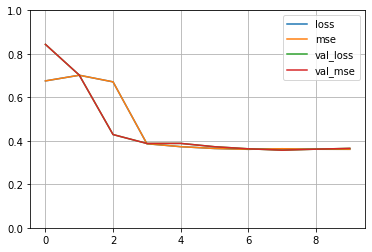

In [11]:
delpoy_history(history.history)